In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
%matplotlib inline

In [ ]:
data=pd.read_csv("/content/insurance_claims_regression.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fraud_flag             227 non-null    float64
 1   days_until_settlement  237 non-null    float64
 2   claim_amount_k         237 non-null    float64
 3   claim_amount_k.1       237 non-null    float64
 4   num_previous_claims    237 non-null    float64
 5   claim_amount_k.2       237 non-null    float64
 6   claim_amount_k.3       237 non-null    float64
 7   policy_type            232 non-null    object 
 8   policy_holder_age      236 non-null    float64
 9   claim_id               236 non-null    object 
dtypes: float64(8), object(2)
memory usage: 20.4+ KB


In [ ]:
data['policy_type'].unique()

array(['Auto', 'ealth', 'Home', nan, 'Lif', 'Health', 'Life', 'HOME',
       'Hom', 'HEALTH', 'Hme', 'AUTO', 'LIFE', 'uto', 'Lie', 'Auo', 'Aut',
       'Healh', 'Ato', 'Hoe', 'ome', 'Heath'], dtype=object)

In [ ]:
data['policy_type'] = data['policy_type'].str.lower().str.strip()
data['policy_type'] = data['policy_type'].replace({
    'heath': 'health',
    'heaith': 'health',
    'ealth':'health',
     'healh':'health',
    'home': 'home',
    'hme': 'home',
    'ato': 'auto',
    'uto':'auto',
    'Auto':'auto',
    'AUTO':'auto',
    'auo':'auto',
    'Aut':'auto',
    'Ato':'auto',
    'aut': 'auto',
    'life': 'life',
    'lief': 'life',
    'lif':'life',
    'lie':'life',
    'hom':'home',
    'hoe':'home',
    'ome':'home'

})

data['policy_type'].unique()

array(['auto', 'health', 'home', nan, 'life'], dtype=object)

In [ ]:
data.describe()
data.isnull().sum()

,0
fraud_flag,33
days_until_settlement,23
claim_amount_k,23
claim_amount_k.1,23
num_previous_claims,23
claim_amount_k.2,23
claim_amount_k.3,23
policy_type,28
policy_holder_age,24
claim_id,24


In [ ]:
data = data.loc[:, ~data.columns.duplicated()]
data = data.T.drop_duplicates().T
data.reset_index(drop=True, inplace=True)
print("Duplicates removed. Remaining columns:")
print(data.columns)
print(data.shape)

Duplicates removed. Remaining columns:
Index(['fraud_flag', 'days_until_settlement', 'claim_amount_k',
       'num_previous_claims', 'policy_type', 'policy_holder_age', 'claim_id'],
      dtype='object')
(260, 7)


In [ ]:
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
if numeric_cols:
    num_imputer = SimpleImputer(strategy='median')
    data[numeric_cols] = num_imputer.fit_transform(data[numeric_cols])
if categorical_cols:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])
print("Missing values handled successfully!")

Missing values handled successfully!


/tmp/ipython-input-79106420.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="viridis")


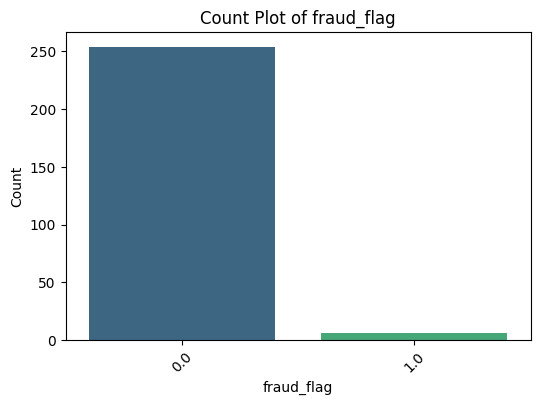

/tmp/ipython-input-79106420.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="viridis")


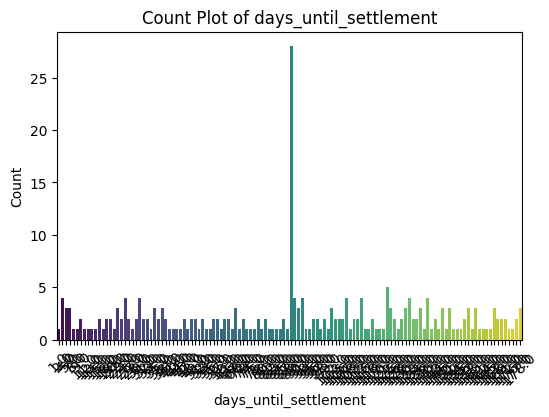

/tmp/ipython-input-79106420.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="viridis")


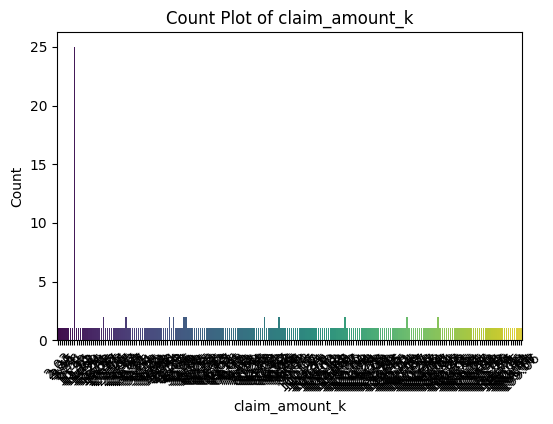

/tmp/ipython-input-79106420.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="viridis")


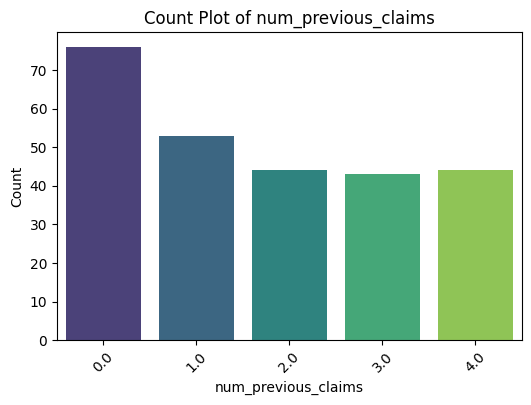

/tmp/ipython-input-79106420.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="viridis")


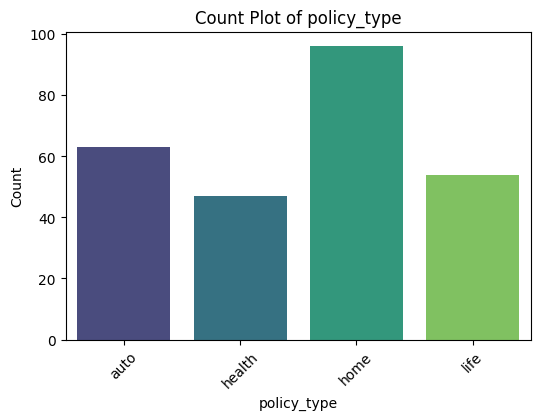

/tmp/ipython-input-79106420.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="viridis")


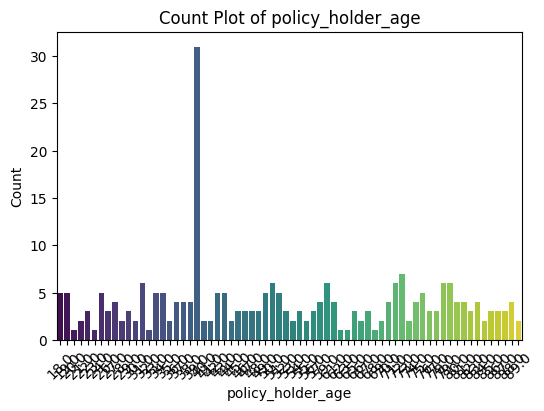

/tmp/ipython-input-79106420.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="viridis")


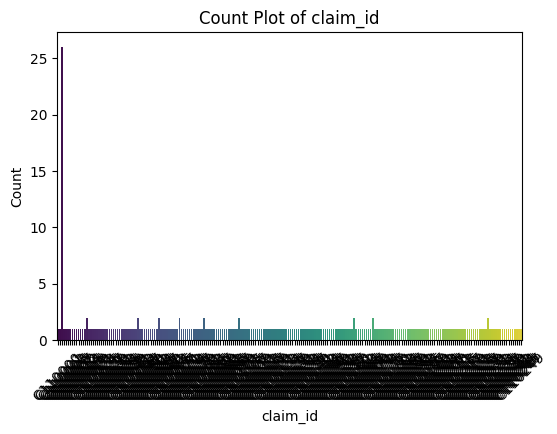

In [ ]:
numeric_cols = data.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data, palette="viridis")
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
data_copy = data.copy()
categorical_cols = data_copy.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    data_copy[col] = data_copy[col].astype(str)  # ensure strings
    data_copy[col] = le.fit_transform(data_copy[col])
data_copy = data_copy.apply(pd.to_numeric, errors='coerce')
data_copy.fillna(0, inplace=True)
float_cols = data_copy.select_dtypes(include=['float']).columns
data_copy[float_cols] = data_copy[float_cols].round(0).astype(int)
print("All features converted to numeric (integers) successfully!")

All features converted to numeric (integers) successfully!


In [ ]:
data_copy.info()
data=data_copy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   fraud_flag             260 non-null    int64
 1   days_until_settlement  260 non-null    int64
 2   claim_amount_k         260 non-null    int64
 3   num_previous_claims    260 non-null    int64
 4   policy_type            260 non-null    int64
 5   policy_holder_age      260 non-null    int64
 6   claim_id               260 non-null    int64
dtypes: int64(7)
memory usage: 14.3 KB


Numerical Columns: ['fraud_flag', 'days_until_settlement', 'claim_amount_k', 'num_previous_claims', 'policy_type', 'policy_holder_age', 'claim_id']


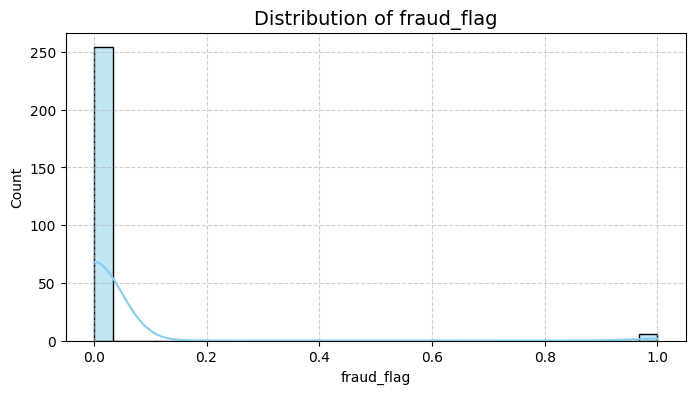

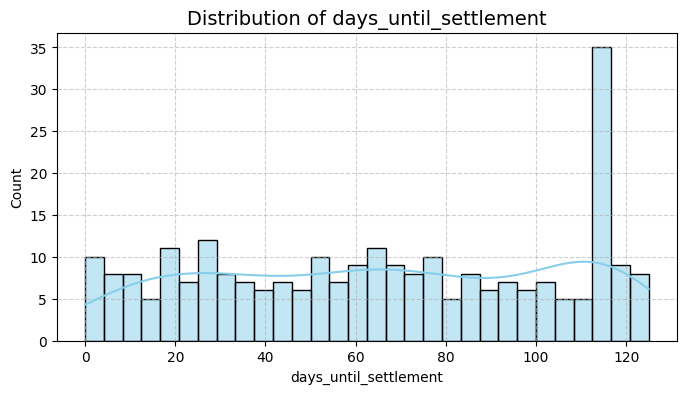

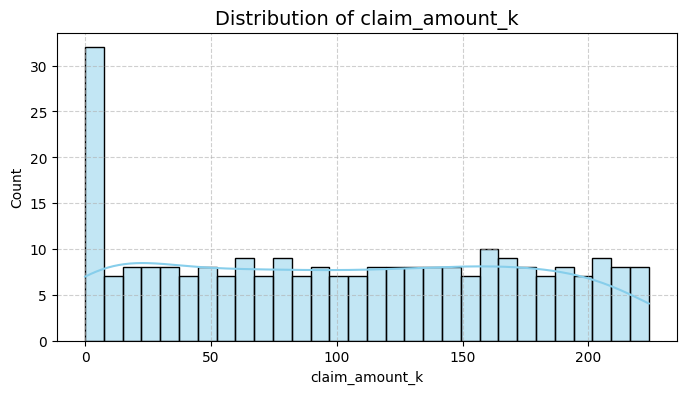

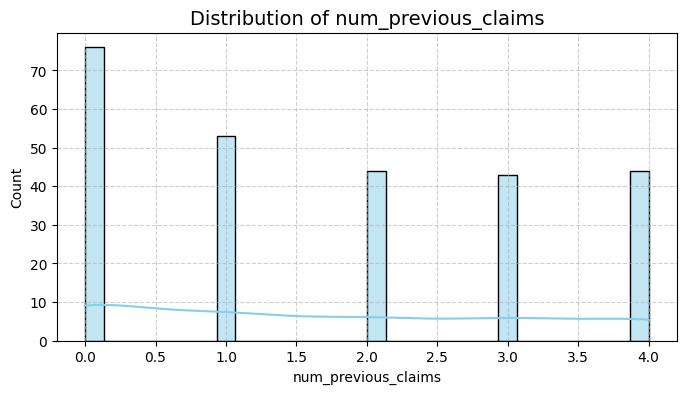

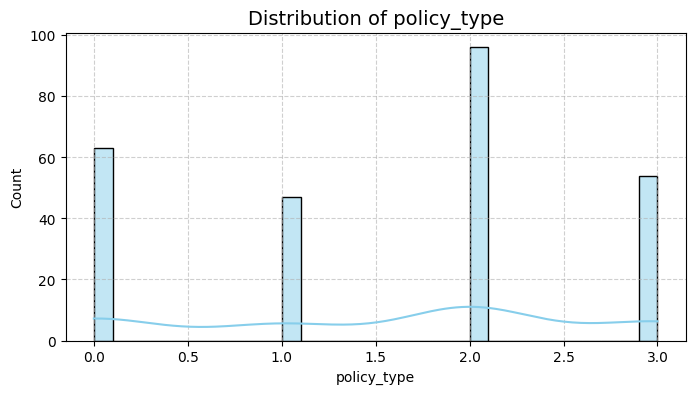

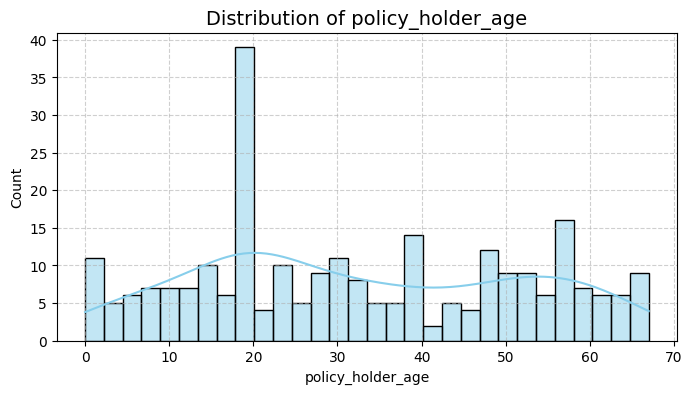

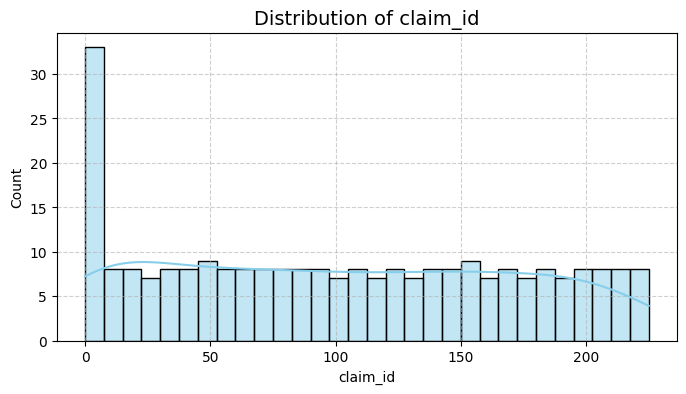

In [ ]:
numeric_cols = data.select_dtypes(include=['number']).columns
print("Numerical Columns:", list(numeric_cols))
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], bins=30, kde=True, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

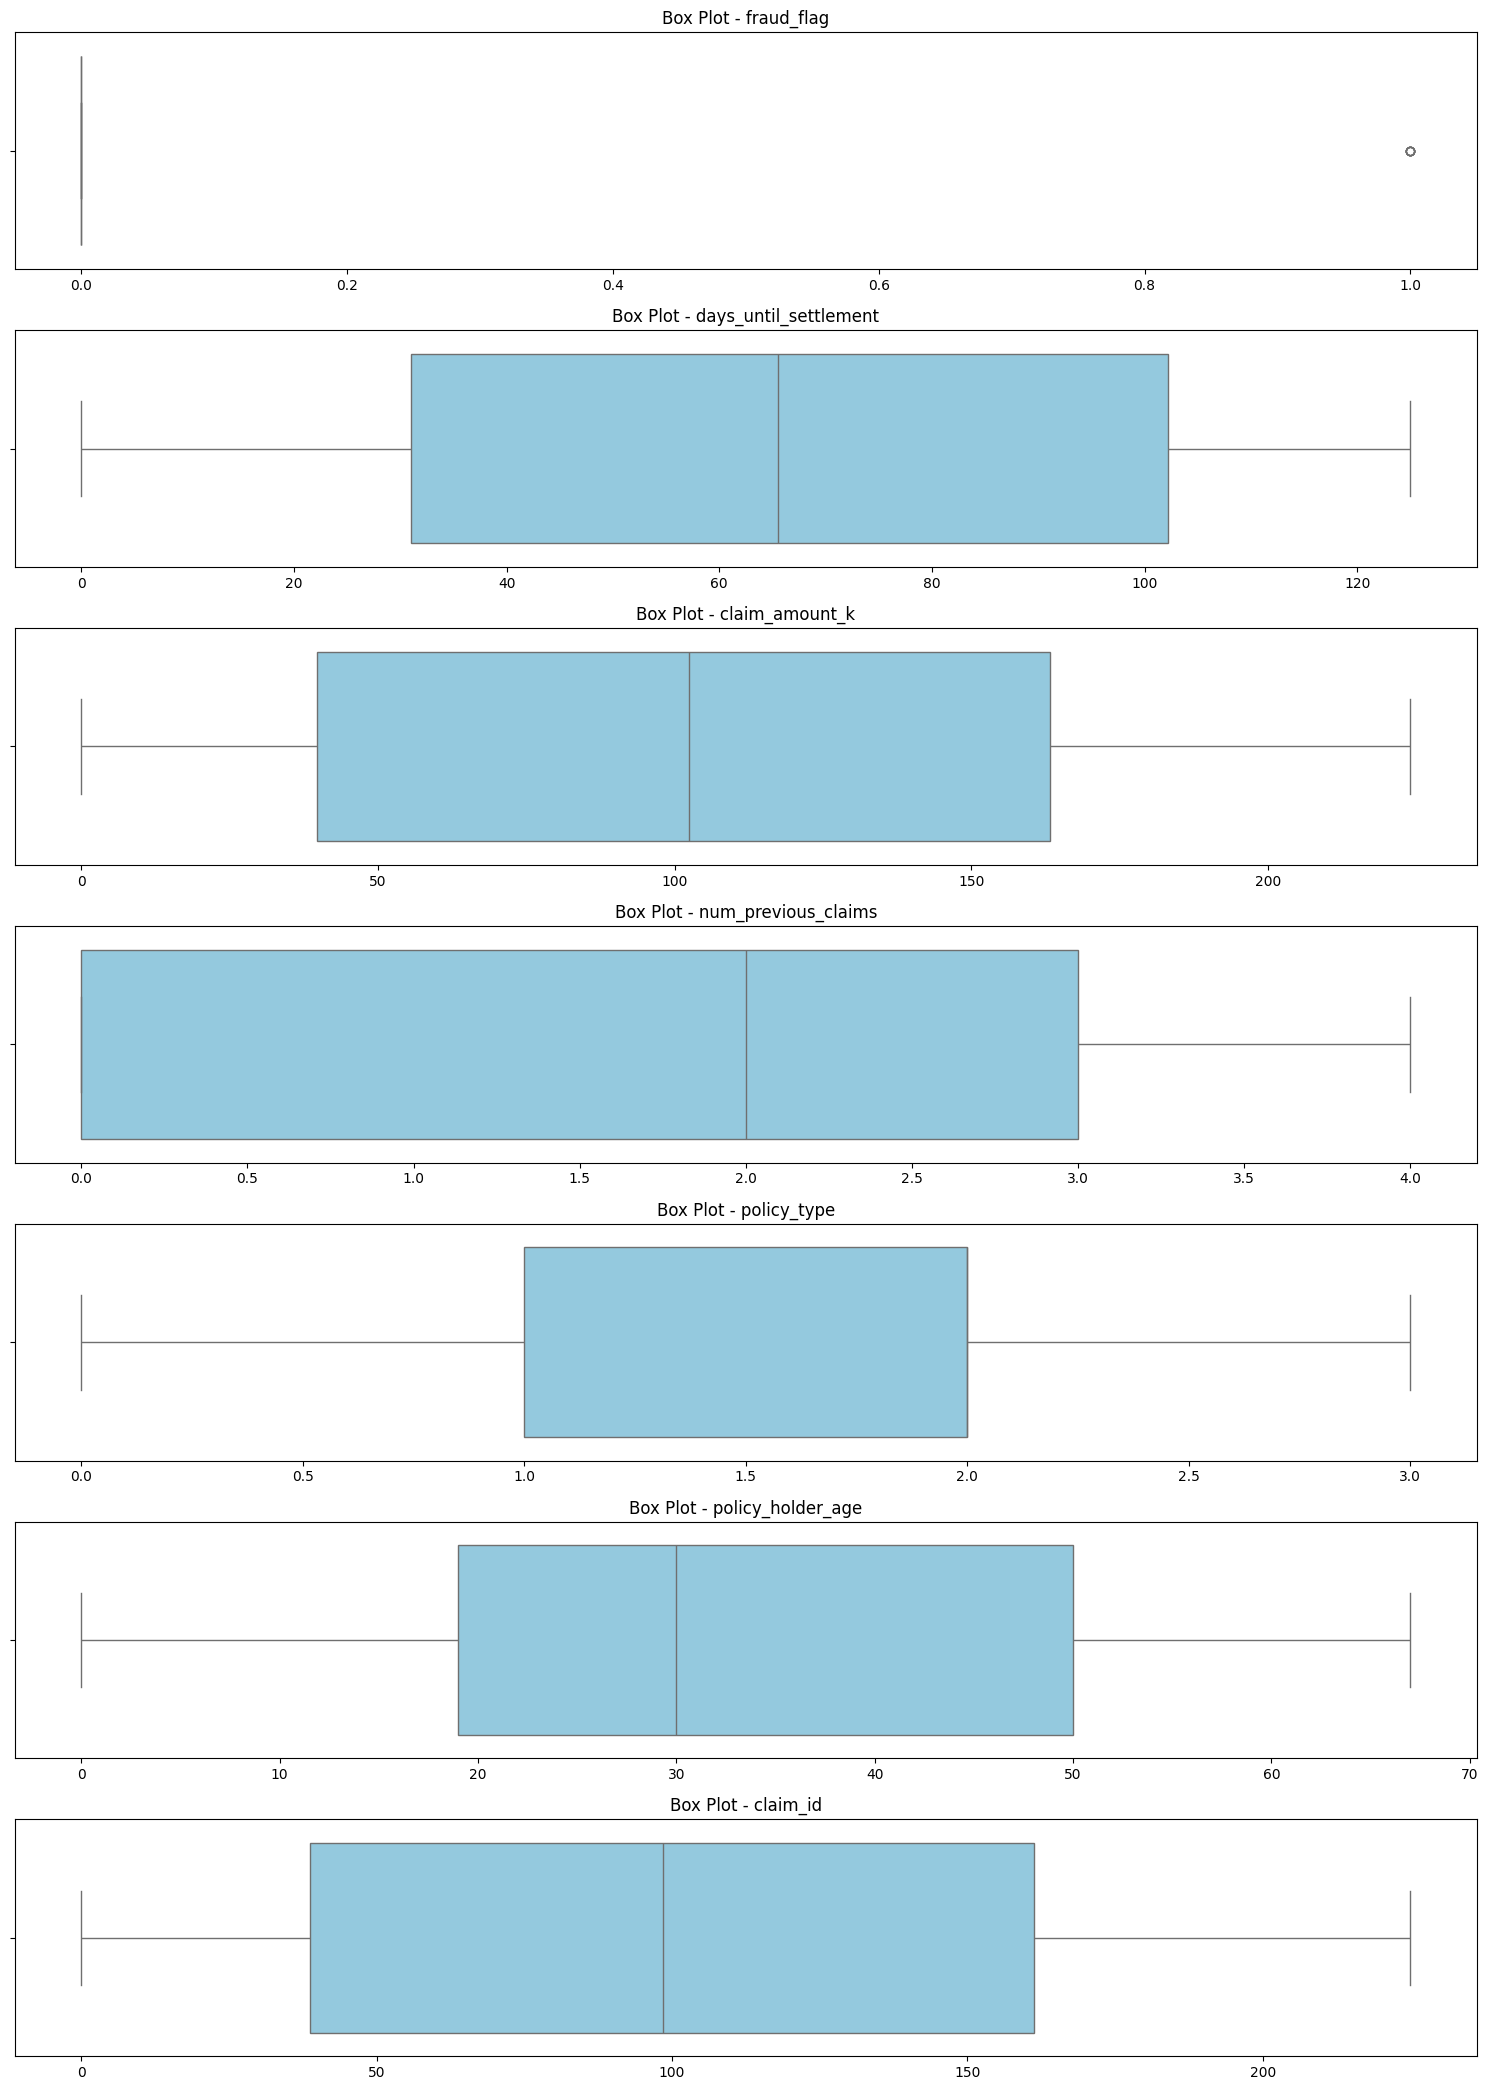

In [ ]:
numeric_cols = data_copy.select_dtypes(include=['int', 'float']).columns
plt.figure(figsize=(15, len(numeric_cols)*3))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=data_copy[col], color='skyblue')
    plt.title(f'Box Plot - {col}', fontsize=12)
    plt.xlabel('')
plt.tight_layout()
plt.show()

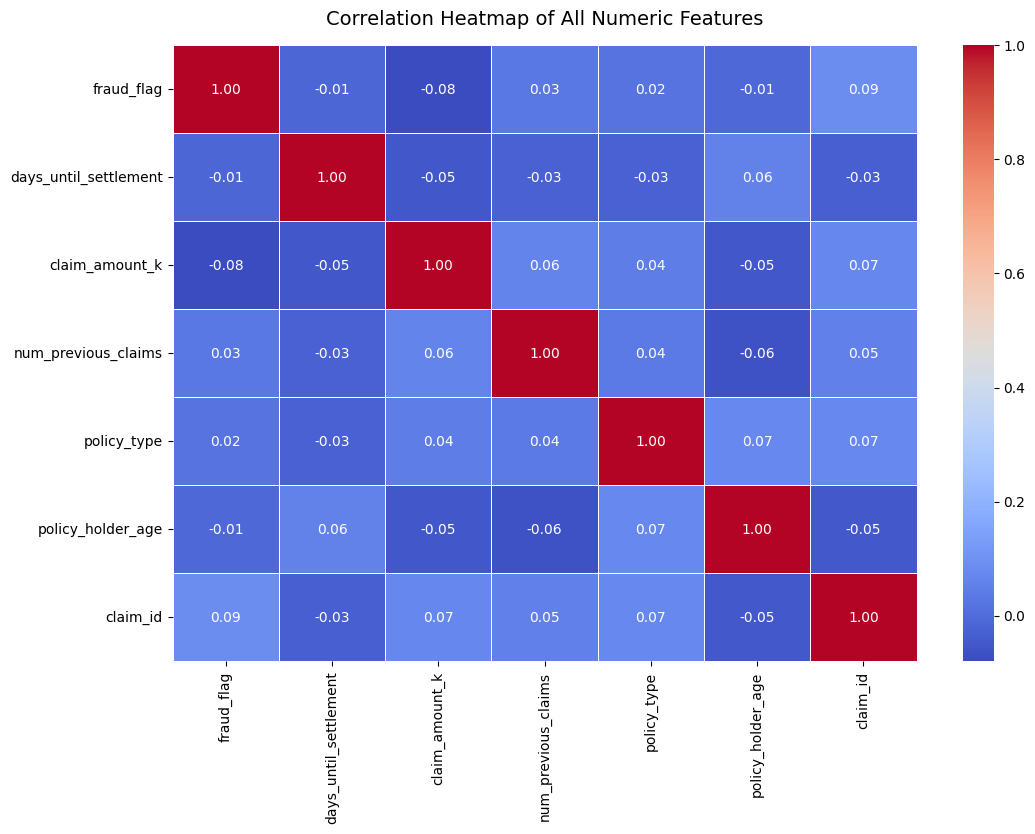

In [ ]:
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    cbar=True
)
plt.title("Correlation Heatmap of All Numeric Features", fontsize=14, pad=15)
plt.show()

In [ ]:
data.corr()

,fraud_flag,days_until_settlement,claim_amount_k,num_previous_claims,policy_type,policy_holder_age,claim_id
fraud_flag,1.000000,-0.014814,-0.080390,0.029942,0.017837,-0.009781,0.085785
days_until_settlement,-0.014814,1.000000,-0.054478,-0.026620,-0.028782,0.058749,-0.033785
claim_amount_k,-0.080390,-0.054478,1.000000,0.062048,0.044712,-0.051094,0.071441
num_previous_claims,0.029942,-0.026620,0.062048,1.000000,0.037174,-0.064391,0.053477
policy_type,0.017837,-0.028782,0.044712,0.037174,1.000000,0.073371,0.074662
policy_holder_age,-0.009781,0.058749,-0.051094,-0.064391,0.073371,1.000000,-0.046871
claim_id,0.085785,-0.033785,0.071441,0.053477,0.074662,-0.046871,1.000000


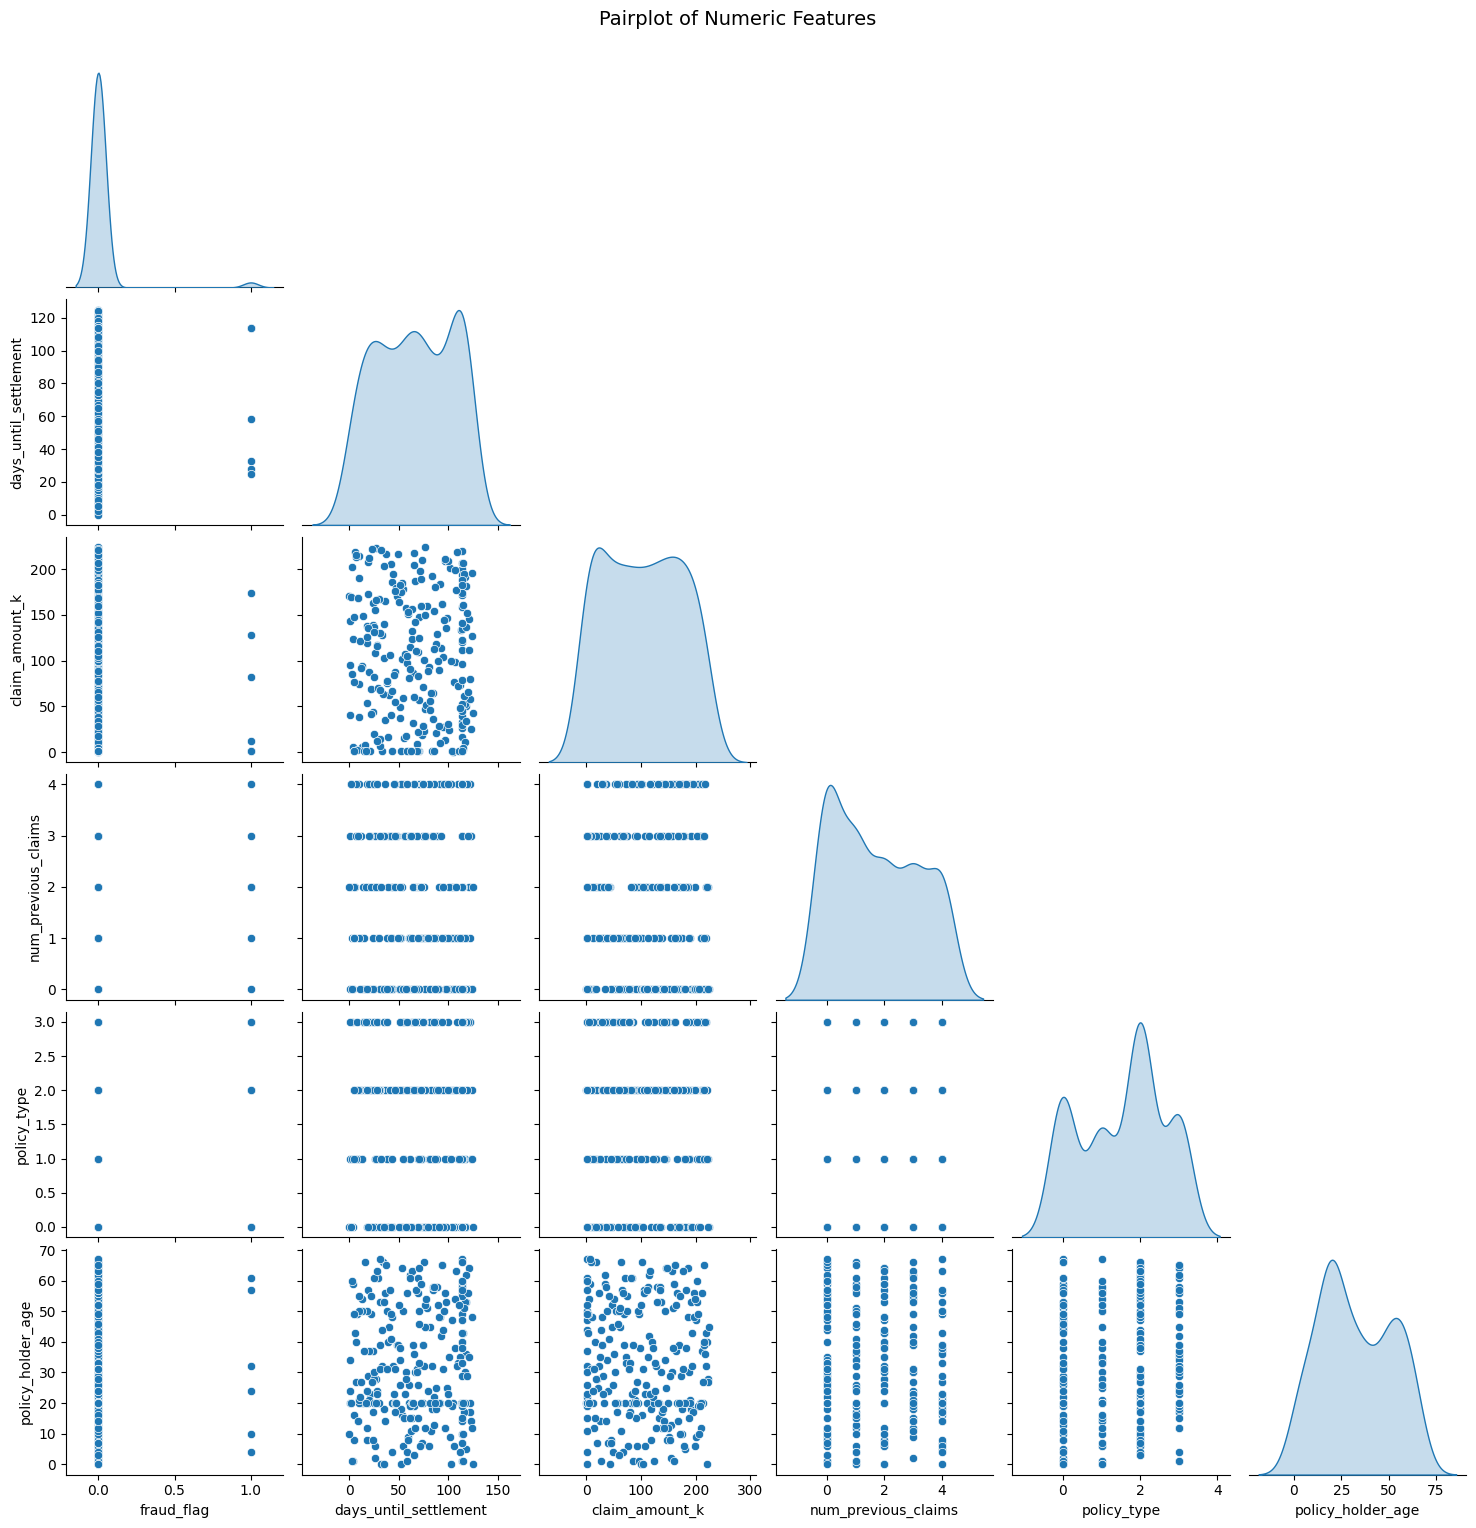

In [ ]:
numeric_cols = data_copy.select_dtypes(include=['int', 'float']).columns
selected_cols = numeric_cols[:6]
sns.pairplot(data_copy[selected_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numeric Features", y=1.02, fontsize=14)
plt.show()